In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [32]:
#데이터 불러오기(암발생자수)
df = pd.read_csv("../1208/03/03_암발생자수_.csv", encoding="cp949")

In [33]:
#열명 변경
# "암종별", "성별", "연령별", "발생자수","조발생률"
df.columns = ["암종별", "성별", "연령별", "발생자수","조발생률"]
#열 데이터 타입 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [8]:
df.index

RangeIndex(start=0, stop=1501, step=1)

In [13]:
df.columns

Index(['암종별', '성별', '연령별', '발생자수', '조발생률'], dtype='object')

In [9]:
# 행, 열 조회
df.loc[0, '암종별']

'24개 암종별'

In [34]:
# 특정행 제거 : 1행제거
df = df.loc[1:,:]
df

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [12]:
#특정 행, 열 자료 추출
df.loc[[1,3],['암종별','발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


In [ ]:
df.iloc[0,0]

In [14]:
import numpy as np

In [17]:
df['발생자수'] = np.where(df['발생자수'] == '-',0, df['발생자수'])
df['조발생률'] = np.where(df['조발생률'] == '-',0, df['조발생률'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   object
 4   조발생률    1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [20]:
#데이터 타입 변경1
df['발생자수'] = df['발생자수'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   int32 
 4   조발생률    1500 non-null   object
dtypes: int32(1), object(4)
memory usage: 52.9+ KB


In [21]:
#데이터 타입 변경2
df['조발생률'] = pd.to_numeric(df['조발생률'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [26]:
#암종류 
lt = list(df['암종별'].unique())
lt = [s[-3:-1] for s in lt]
lt

['96',
 '14',
 '15',
 '16',
 '20',
 '22',
 '24',
 '25',
 '32',
 '34',
 '50',
 '53',
 '54',
 '56',
 '61',
 '62',
 '64',
 '67',
 '72',
 '73',
 '81',
 '96',
 '90',
 '95',
 '96']

In [27]:
lt = [int(s) for s in lt]
lt

[96,
 14,
 15,
 16,
 20,
 22,
 24,
 25,
 32,
 34,
 50,
 53,
 54,
 56,
 61,
 62,
 64,
 67,
 72,
 73,
 81,
 96,
 90,
 95,
 96]

In [30]:
# np.where 안쓰고 하기
# replace 는 문자열만 가능
temp = list(df['발생자수'])
temp = [int(str(s).replace('-','0')) for s in temp]
df['발생자수'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int64  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [36]:
def funCol(col, df) :
    temp = list(df[col])
    temp = [float(str(s).replace('-','0')) for s in temp]
    df[col] = temp


In [37]:
for c in ['발생자수', '조발생률'] :
    funCol(c, df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   float64
 4   조발생률    1500 non-null   float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


In [31]:
temp = list(df['조발생률'])
temp = [float(str(s).replace('-','0')) for s in temp]
df['조발생률'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int64  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [25]:
lt = [s[-4:-1] for s in lt]
lt

['C96',
 'C14',
 'C15',
 'C16',
 'C20',
 'C22',
 'C24',
 'C25',
 'C32',
 'C34',
 'C50',
 'C53',
 'C54',
 'C56',
 'C61',
 'C62',
 'C64',
 'C67',
 'C72',
 'C73',
 'C81',
 'C96',
 'C90',
 'C95',
 'C96']

In [ ]:
lt = []

In [39]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [46]:
# 데이터프레임에 대한 열리스트 
df1 = df[(df['암종별'] == '모든 암(C00-C96)' ) & (df['연령별'] != "계") & (df['성별'] == '계')][['연령별', '발생자수']]
df1

,연령별,발생자수
2,0-4세,406.0
3,5-9세,220.0
4,10-14세,300.0
5,15-19세,583.0
6,20-24세,1344.0
7,25-29세,2896.0
8,30-34세,4652.0
9,35-39세,8845.0
10,40-44세,12427.0
11,45-49세,17759.0


In [45]:
df1 = df[['연령별', '발생자수']]
df1

,연령별,발생자수
1,계,254718.0
2,0-4세,406.0
3,5-9세,220.0
4,10-14세,300.0
5,15-19세,583.0
...,...,...
1496,70-74세,1096.0
1497,75-79세,1357.0
1498,80-84세,1420.0
1499,85세이상,1273.0


In [48]:
df1 = df1.set_index('연령별')
df1

,발생자수
연령별,
0-4세,406.0
5-9세,220.0
10-14세,300.0
15-19세,583.0
20-24세,1344.0
25-29세,2896.0
30-34세,4652.0
35-39세,8845.0
40-44세,12427.0


In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

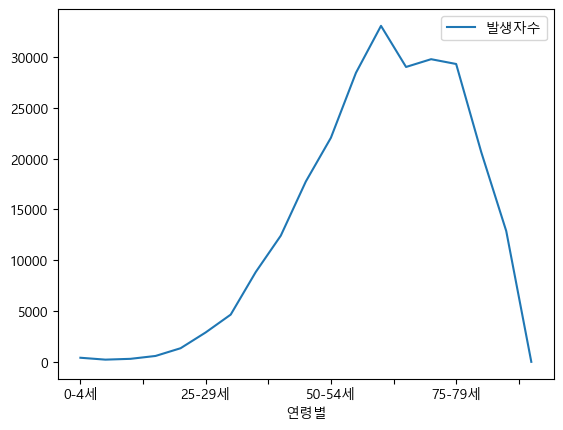

In [54]:

df1.plot()
plt.show()

In [55]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [64]:
df2 = df[(df['연령별'] != '계') & (df['암종별'] != '모든 암(C00-C96)') & (df['성별'] != '계')]
df2 

,암종별,성별,연령별,발생자수,조발생률
82,"입술, 구강 및 인두(C00-C14)",남자,0-4세,0.0,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,5-9세,1.0,0.1
84,"입술, 구강 및 인두(C00-C14)",남자,10-14세,3.0,0.3
85,"입술, 구강 및 인두(C00-C14)",남자,15-19세,7.0,0.5
86,"입술, 구강 및 인두(C00-C14)",남자,20-24세,18.0,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096.0,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357.0,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420.0,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273.0,243.6


In [61]:
df2.groupby(['암종별','성별']).mean(['발생자수','조발생률'])

발생자수       조발생률
암종별          성별                        
간(C22)       계    821.315789  38.810526
             남자   607.421053  63.189474
             여자   213.894737  20.931579
갑상선(C73)     계   1614.526316  46.357895
             남자   395.578947  23.210526
...                      ...        ...
호지킨 림프종(C81) 남자     9.526316   0.678947
             여자     6.684211   0.515789
후두(C32)      계     64.315789   3.115789
             남자    60.736842   7.105263
             여자     3.578947   0.347368

[72 rows x 2 columns]

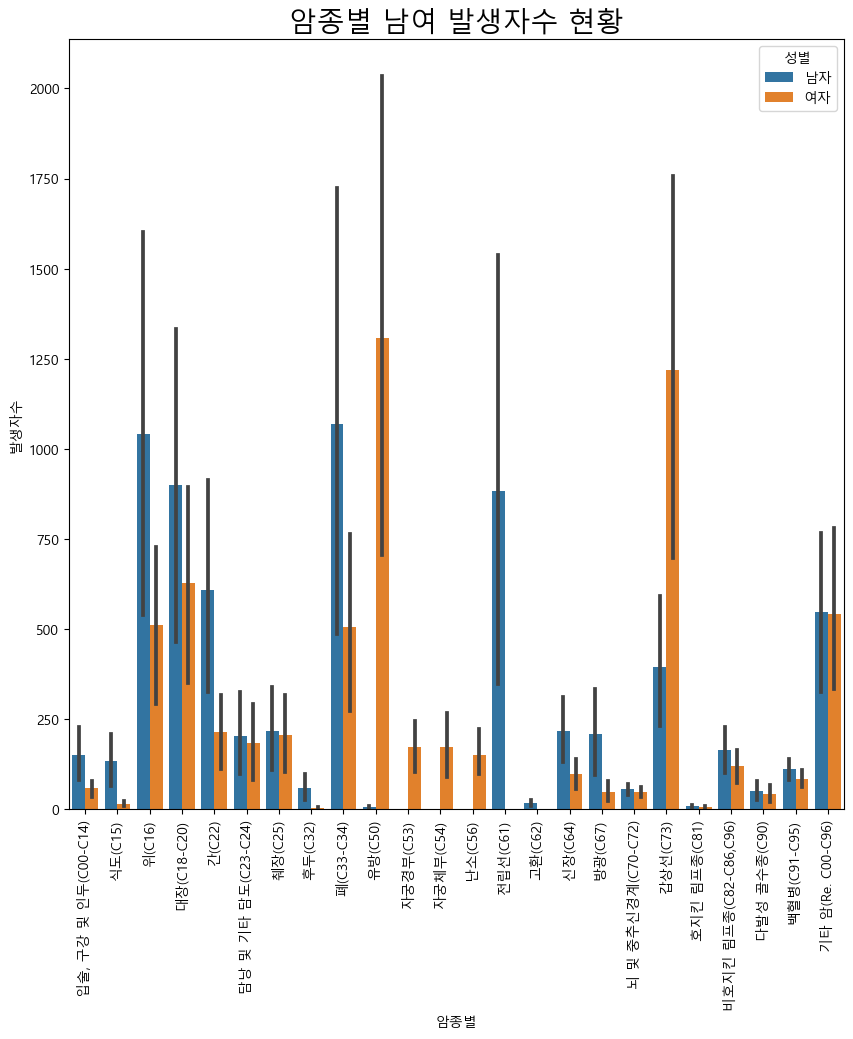

In [69]:
plt.figure(figsize = (10,10))
sns.barplot(x='암종별', y = '발생자수', hue='성별',data = df2)
plt.title('암종별 남여 발생자수 현황', fontsize = 20)
plt.xticks(rotation=90)
plt.show()